In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [44]:
GridSearchCV?

In [18]:
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
y = pd.DataFrame(data['target'], columns=['MEDV'])
y.head()


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## We are trying to predict house price using many different housing attributes (e.g. Rooms; Crime rate; etc)
### Question 1: What type of Machine Learning Problem is this?

##### Supervised Machine learning

### Question 2: What other regressors besides trees could we use for this problem?

#### linear Regression, logistic regression

### Split data in to training and test set, with half of data in the test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

### Question 3: How many houses are in the training and test sets? And how many features are there? Print them to the screen.¶


In [22]:
print(train_test_split(X, y, test_size=0.5, random_state=1))

[         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
432   6.44405   0.0  18.10   0.0  0.584  6.425   74.8  2.2004  24.0  666.0   
403  24.80170   0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
349   0.02899  40.0   1.25   0.0  0.429  6.939   34.5  8.7921   1.0  335.0   
433   5.58107   0.0  18.10   0.0  0.713  6.436   87.9  2.3158  24.0  666.0   
410  51.13580   0.0  18.10   0.0  0.597  5.757  100.0  1.4130  24.0  666.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
255   0.03548  80.0   3.64   0.0  0.392  5.876   19.1  9.2203   1.0  315.0   
72    0.09164   0.0  10.81   0.0  0.413  6.065    7.8  5.2873   4.0  305.0   
396   5.87205   0.0  18.10   0.0  0.693  6.405   96.0  1.6768  24.0  666.0   
235   0.33045   0.0   6.20   0.0  0.507  6.086   61.5  3.6519   8.0  307.0   
37    0.08014   0.0   5.96   0.0  0.499  5.850   41.5  3.9342   5.0  279.0   

     PTRATIO       B  LSTAT  
432     20.2   97.95  12.03  
40

### Question 4: Using DecisionTreeRegressor, Fit a Decision Tree to the training data; with maximum tree depth set to 3. Make sure to set a random seed.¶


In [45]:
DecisionTreeRegressor(X_train,y_train,max_depth=3,random_state=1)
# Create Decision Tree Regressor object
clf = DecisionTreeRegressor(max_depth=3,random_state=1)

# Train Decision Tree  Regressor
clf = clf.fit(X_train,y_train)
clf

DecisionTreeRegressor(max_depth=3, random_state=1)

### Question 5: Visualize the Tree that has been fit to the training data using the plot_tree function


<Figure size 1440x1800 with 0 Axes>

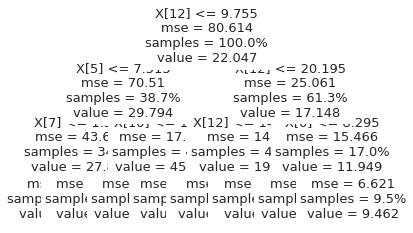

<Figure size 1440x1800 with 0 Axes>

In [52]:
plot_tree(clf, fontsize=13, proportion=33, rotate=14);
#plt.show()
#plot_tree?
plt.figure(num=3,figsize=(20,25),facecolor='g')

### Question 6: Use the trained model to predict prices for the houses in the test set. Plot y-predicted (x-axis) vs y-actual on a scatter plot. Add a line to represent where perfect predictions would be.¶


In [26]:
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


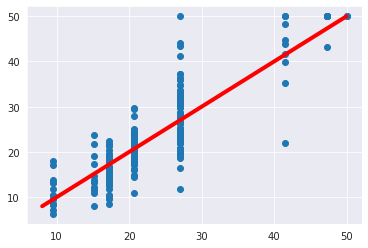

In [55]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
plt.scatter(y_pred,y_test) 
x=np.linspace(8,50,100)
f=x
plt.plot(x,f,'r-',linewidth=4)


### Question 7: Use Mean Squared Error (MSE) to calculate the test error


In [56]:
mean_squared_error(y_pred,y_test)

24.078745008158172

# Ensemble Methods: Bagging and Random Forests


## Use the RandomForestRegressor Function to apply Bagging. Remember the only difference between Random Forests and Bagging is the number of 'max_features' to consider at each split. Bagging considers all features.¶


In [57]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=0)
regr1.fit(X_train, y_train.values.ravel())


RandomForestRegressor(max_features=13, random_state=0)

### Question 8: Like before, plot y-predicted (x-axis) vs y-actual on a scatter plot. Add a line to represent where perfect predictions would be.¶


In [32]:
y_pred1=regr1.predict(X_test.values)
X_test.shape

(253, 13)

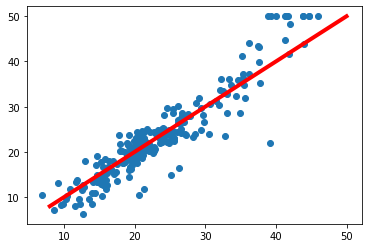

In [33]:
plt.scatter(y_pred1,y_test)
#sns.scatterplot(y_pred,y_test)
x=np.linspace(8,50,100)
f=x
plt.plot(x,f,'r-',linewidth=4)

### Question 9: Use Mean Squared Error (MSE) to calculate the test error¶


In [34]:
print(mean_squared_error(y_pred1,y_test))

11.50861998418972


## Use the RandomForestRegressor Function to apply Random Forest. Random Forest considers a subset of the features.¶

In [77]:
# Random forests: using 6 randoml selected features at each split
regr2 = RandomForestRegressor(max_features=6, random_state=0)
regr2.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_features=6, random_state=0)

### Question 10: Use Mean Squared Error (MSE) to calculate the test error¶


In [78]:
y_pred2=regr2.predict(X_test)
mean_squared_error(y_pred2,y_test)

11.711099754940717

### Question 11: Plot a feature importance figure to understand which of the 13 features can best explain the response variable. Do the most important features make intuitive sense to you?¶


In [37]:
X.insert(13,'Medv',y)

In [38]:
X.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


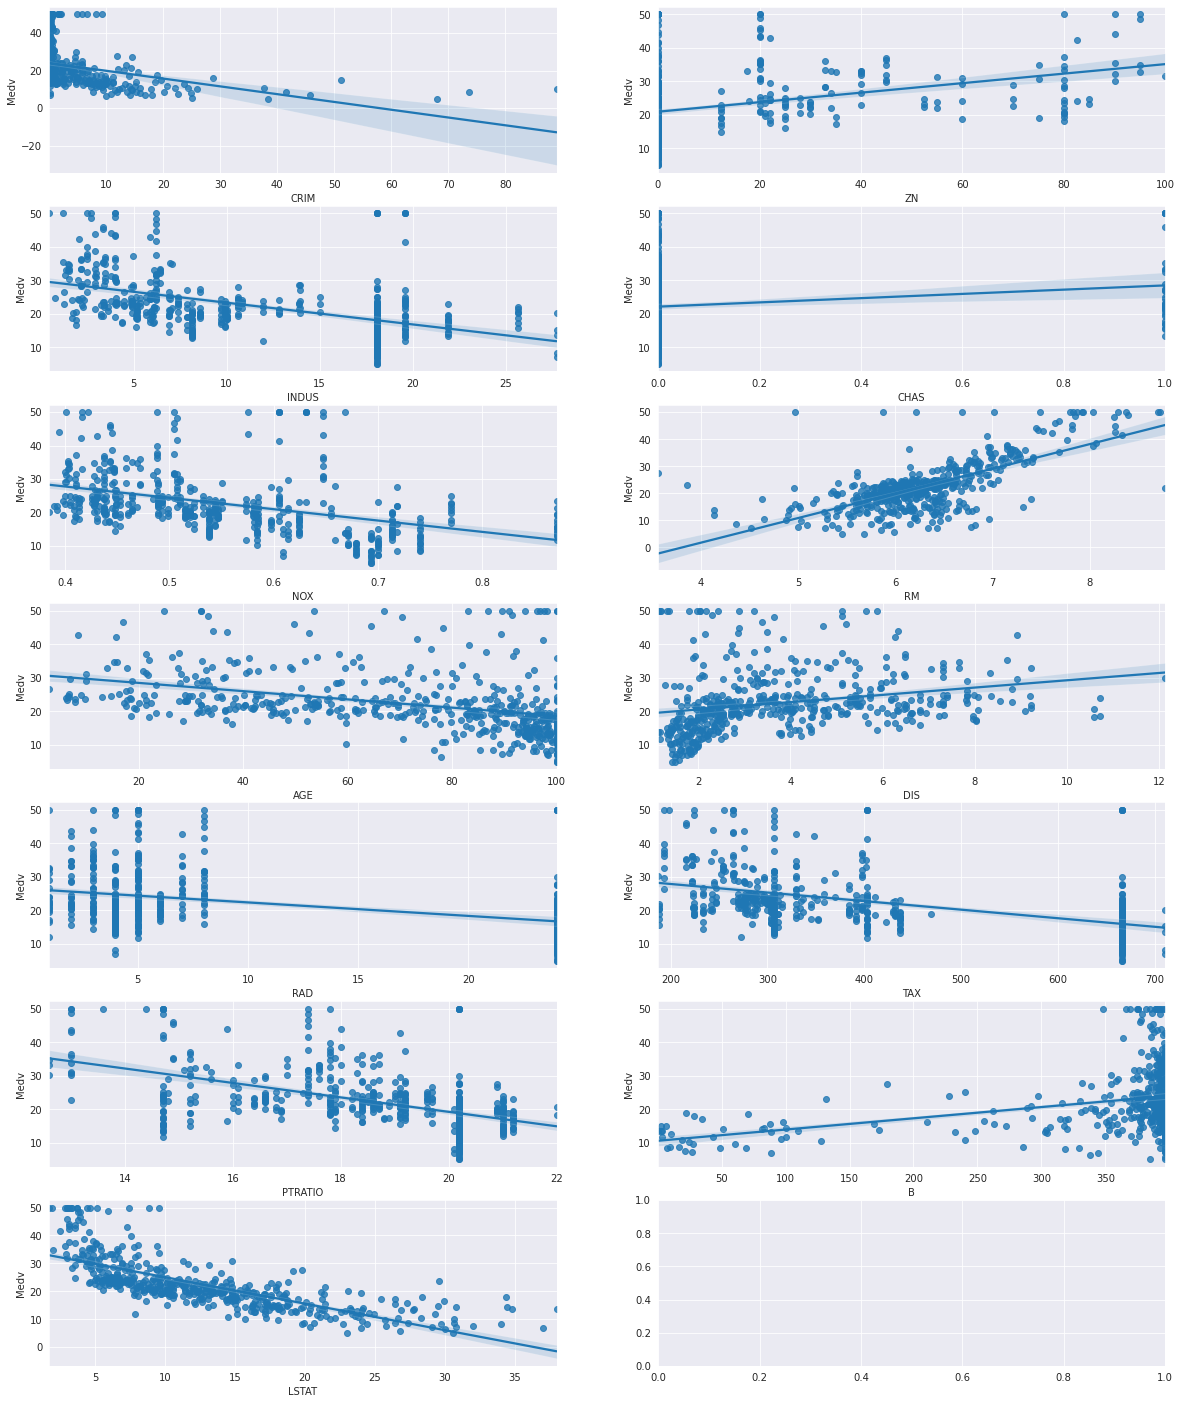

In [43]:
sns.set_style('darkgrid')

numerical_cols=data['feature_names']
fig,axes=plt.subplots(nrows = 7,ncols=2, figsize=(20,25))

for ax, col in list(zip(axes.flat, numerical_cols)):
    sns.regplot(col,'Medv', data=X,ax=ax)

### Bonus Question #1: use GridSearchCV to tune two hyper-parameters to improve the model further


In [42]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

### Bonus Question #2: if this MSE is not lower than the previous ones, what does this suggest about the previous models?
